# Trabajo Semanal 4

Para esta tarea vamos a implementar nociones basicas de la estimacion espectral de tipo senoidal contaminada con ruido:

 $x(n) = a_1 \cdot \sin(\Omega_1 \cdot n) + n_a(n)$

teniendo :   $\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}$

Y :     $\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}$

con:     $\Omega_0 = \frac{\pi}{2}$



sus variables aleatorias definidas: 
$f_r \sim \mathcal{U}\left(-\frac{1}{2}, \frac{1}{2}\right)$

$n_a \sim \mathcal{N}(0, \sigma^2)$


Se quiere evaluar los sigueinte estiamdores:

de amplitud :   
$\hat{a}_1^{(i)} = \left| X_w^{(i)}(\Omega_0) \right| = \left| \mathcal{F} \{ x(n) \cdot w_i(n) \} \right|$

de frecuencia ; 

$\hat{\Omega}_1^{(i)} = \arg\max_f \left\{ \left| X_w^{(i)}(\Omega) \right| \right\}$




para la i-ésima ventana que analice:

-   rectangular (sin ventana), 
-   flattop 
-   blackmanharris
-   otras que analice
Y siguiendo las siguientes consignas para su experimentación:

Considere 200 realizaciones de 1000 muestras para cada experimento.
Parametrice para SNR's de 3 y 10 db (Ayuda: calibre a1
 para que la potencia de la senoidal sea 1W).

1) Realizar una tabla por cada SNR, que describa el sesgo y la varianza de cada estimador para cada ventana analizada. Recuerde incluir las ventanas rectangular (sin ventana), flattop y blackmanharris y otras que considere.


In [451]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
from scipy import signal
from scipy.fft import fft, fftshift
import pandas as pd

In [452]:
##Declaracion de variables fijas
N=1000 # Cantidad de muestras
R=200 # Realizaciones
fs=1000 #Frecuecia de muestreo
a1= np.sqrt(2) #Amplitud de la señal
df=fs/N #rResolucion espectral
tt = np.arange(0,1,1/N).reshape((N,1))# Vector de tiempo de columna 1000x1
tt = np.tile(tt, (1, R)) # Vector de 1000x200
Pn= 1/10 #Potencia de ruido cuantizado con 10 dB
Pn_3= 0.5 #Potencia de ruido cuantizado con 3dB

omega_0=fs/4 # Frecuencia central en Heartz
fr=np.random.uniform(-0.5,0.5,size=(1,R)) # Frecuencia aletearia
omega_1= omega_0 + fr*df #Frecuencia a estimar
valor_omega=np.mean(omega_1)#valor medio de omega_1

xx = a1*np.sin(2*np.pi*omega_1*tt) # Hay que multiplicar por 2pi sino, no queda. Señal limpia

sigma=np.sqrt(Pn) # Potencia de ruido. valor para usar en varianza
nn= np.random.normal(0,sigma,size=(N,1)) # Ruido en 1000x1
nn = np.tile(nn, (1, R))

sigma_3= np.sqrt(Pn_3) # Potencia de ruido. valor para usar en varianza
nn_3= np.random.normal(0,sigma_3,size=(N,1)) # Ruido en 1000x1
nn_3= np.tile(nn_3, (1, R))

S_10= xx + nn # Señal con ruido de 10dB
S_3= xx + nn_3 # Señal con ruido de 3dB

Obs: para tener obetener 200 señales realizadas en una matriz que tenga 1000 muestras por cada realizacion. Primero aplico una amplitud a la señal para que normalize la potencia de la señal, luego genero un vector columna de 1000 de altura. 
Luego para obtener un piso de ruido, despajamos de la ecuacion el valor de $P_n$.  $SNR_db = 10log(P_s/P_n) $ con $P_s=1$ esta al tener una amplitud que la normaliza. Lo mismo para  un $SNR_dB$ de 3dB. 

Para la frecuencia central se uso la mitad de la frecuencia de Nyquist. a eso le agremamos una pequeña varianza con una frecuencia aleatoria a partir de un distribucion uniforme y eso lo preparamos para 200 señales distinas con frecuencias aleatorias.

Se le agrega un piso de ruido a traves de una distribucion normal, que tiene un varianza igual a la potencia de ruido que calculamos antes. Ademas se lo puso en forma de matriz para poder sumarlo con la señal senoidal. Se repitio pero para 3dB


In [453]:
##Ventanas

#Calculo de ventanas
window_1 = signal.windows.blackmanharris(N)
window_2 = signal.windows.flattop(N)
window_3 = signal.windows.boxcar(N)
window_4 = signal.windows.triang(N)
window_5 = signal.windows.nuttall(N)

#Reacomodo la matriz de la ventana
win_1=window_1.reshape((N,1))
win_2=window_2.reshape((N,1))
win_3=window_3.reshape((N,1))
win_4=window_4.reshape((N,1))
win_5=window_5.reshape((N,1))

In [454]:
##Transformada
#Aplico la ventana
ventaneo_1 = S_10*win_1
ventaneo_2 = S_10*win_2
ventaneo_3 = S_10*win_3
ventaneo_4 = S_10*win_4
ventaneo_5 = S_10*win_5
ventaneo_6 = S_3*win_1
ventaneo_7 = S_3*win_2
ventaneo_8 = S_3*win_3
ventaneo_9 = S_3*win_4
ventaneo_10 = S_3*win_5

#Calculo la fft
final_fft_1=1/N*np.fft.fft(ventaneo_1,axis=0)
final_fft_2=1/N*np.fft.fft(ventaneo_2,axis=0)
final_fft_3=1/N*np.fft.fft(ventaneo_3,axis=0)
final_fft_4=1/N*np.fft.fft(ventaneo_4,axis=0)
final_fft_5=1/N*np.fft.fft(ventaneo_5,axis=0)
final_fft_6=1/N*np.fft.fft(ventaneo_6,axis=0)
final_fft_7=1/N*np.fft.fft(ventaneo_7,axis=0)
final_fft_8=1/N*np.fft.fft(ventaneo_8,axis=0)
final_fft_9=1/N*np.fft.fft(ventaneo_9,axis=0)
final_fft_10=1/N*np.fft.fft(ventaneo_10,axis=0)

#Aplico el valor absoluta a la transformada
final_BMH = np.abs(final_fft_1)
final_FLT = np.abs(final_fft_2)
final_BOX = np.abs(final_fft_3)
final_TRA = np.abs(final_fft_4)
final_NUT = np.abs(final_fft_5)
final_BMH_2 = np.abs(final_fft_6)
final_FLT_2 = np.abs(final_fft_7)
final_BOX_2 = np.abs(final_fft_8)
final_TRA_2 = np.abs(final_fft_9)
final_NUT_2 = np.abs(final_fft_10)

In [455]:
#Calculo de estimadores

indice= N//4
## Amplitud
a_estimador_1 = final_BMH[indice] 
a_estimador_2 = final_FLT[indice]
a_estimador_3 = final_BOX[indice]
a_estimador_4 = final_TRA[indice]
a_estimador_5 = final_NUT[indice]
a_estimador_6 = final_BMH_2[indice] 
a_estimador_7 = final_FLT_2[indice] 
a_estimador_8 = final_BOX_2[indice] 
a_estimador_9 = final_TRA_2[indice] 
a_estimador_10 = final_NUT_2[indice] 

##Frecuencia
k_1=np.argmax(final_BMH[:N//2, :],axis=0)
k_2=np.argmax(final_FLT[:N//2, :],axis=0)
k_3=np.argmax(final_BOX[:N//2, :],axis=0)
k_4=np.argmax(final_TRA[:N//2, :],axis=0)
k_5=np.argmax(final_NUT[:N//2, :],axis=0)
k_6=np.argmax(final_BMH_2[:N//2, :],axis=0)
k_7=np.argmax(final_FLT_2[:N//2, :],axis=0)
k_8=np.argmax(final_BOX_2[:N//2, :],axis=0)
k_9=np.argmax(final_TRA_2[:N//2, :],axis=0)
k_10=np.argmax(final_NUT_2[:N//2, :],axis=0)

omega_estimador_1 = k_1*df
omega_estimador_2 = k_2*df
omega_estimador_3 = k_3*df
omega_estimador_4 = k_4*df
omega_estimador_5 = k_5*df
omega_estimador_6 = k_6*df
omega_estimador_7 = k_7*df
omega_estimador_8 = k_8*df
omega_estimador_9 = k_9*df
omega_estimador_10 = k_10*df


In [456]:
##Calculo del estimador de amplitud
#Sesgo
esperanza_a_BHK = np.mean(a_estimador_1)
esperanza_a_FLT = np.mean(a_estimador_2)
esperanza_a_BOX = np.mean(a_estimador_3)
esperanza_a_TRA = np.mean(a_estimador_4)
esperanza_a_NUT = np.mean(a_estimador_5)
esperanza_a_BHK_2 = np.mean(a_estimador_6)
esperanza_a_FLT_2 = np.mean(a_estimador_7)
esperanza_a_BOX_2 = np.mean(a_estimador_8)
esperanza_a_TRA_2 = np.mean(a_estimador_9)
esperanza_a_NUT_2 = np.mean(a_estimador_10)


sesgo_a_BHK = esperanza_a_BHK - a1
sesgo_a_FLT = esperanza_a_FLT - a1
sesgo_a_BOX = esperanza_a_BOX - a1
sesgo_a_TRA = esperanza_a_TRA - a1
sesgo_a_NUT = esperanza_a_NUT - a1
sesgo_a_BHK_2 = esperanza_a_BHK_2 - a1
sesgo_a_FLT_2 = esperanza_a_FLT_2 - a1
sesgo_a_BOX_2 = esperanza_a_BOX_2 - a1
sesgo_a_TRA_2 = esperanza_a_TRA_2 - a1
sesgo_a_NUT_2 = esperanza_a_NUT_2 - a1


#Varianza
varianza_a_BHK = np.var(a_estimador_1)
varianza_a_FLT = np.var(a_estimador_2)
varianza_a_BOX = np.var(a_estimador_3)
varianza_a_TRA = np.var(a_estimador_4)
varianza_a_NUT = np.var(a_estimador_5)
varianza_a_BHK_2 = np.var(a_estimador_6)
varianza_a_FLT_2 = np.var(a_estimador_7)
varianza_a_BOX_2 = np.var(a_estimador_8)
varianza_a_TRA_2 = np.var(a_estimador_9)
varianza_a_NUT_2 = np.var(a_estimador_10)

In [457]:
## Calculo del estimador de frecuencia

esperanza_omega_BHK = np.mean(omega_estimador_1)
esperanza_omega_FLT = np.mean(omega_estimador_2)
esperanza_omega_BOX = np.mean(omega_estimador_3)
esperanza_omega_TRA = np.mean(omega_estimador_4)
esperanza_omega_NUT = np.mean(omega_estimador_5)
esperanza_omega_BHK_2 = np.mean(omega_estimador_6)
esperanza_omega_FLT_2 = np.mean(omega_estimador_7)
esperanza_omega_BOX_2 = np.mean(omega_estimador_8)
esperanza_omega_TRA_2 = np.mean(omega_estimador_9)
esperanza_omega_NUT_2 = np.mean(omega_estimador_10)

#Sesgo
sesgo_omega_BHK = esperanza_omega_BHK - valor_omega
sesgo_omega_FLT = esperanza_omega_FLT - valor_omega
sesgo_omega_BOX = esperanza_omega_BOX - valor_omega
sesgo_omega_TRA = esperanza_omega_TRA - valor_omega
sesgo_omega_NUT = esperanza_omega_NUT - valor_omega
sesgo_omega_BHK_2 = esperanza_omega_BHK_2 - valor_omega
sesgo_omega_FLT_2 = esperanza_omega_FLT_2 - valor_omega
sesgo_omega_BOX_2 = esperanza_omega_BOX_2 - valor_omega
sesgo_omega_TRA_2 = esperanza_omega_TRA_2 - valor_omega
sesgo_omega_NUT_2 = esperanza_omega_NUT_2 - valor_omega

#Varianza
varianza_omega_BHK = np.var(omega_estimador_1)
varianza_omega_FLT = np.var(omega_estimador_2)
varianza_omega_BOX = np.var(omega_estimador_3)
varianza_omega_TRA = np.var(omega_estimador_4)
varianza_omega_NUT = np.var(omega_estimador_5)
varianza_omega_BHK_2 = np.var(omega_estimador_6)
varianza_omega_FLT_2 = np.var(omega_estimador_7)
varianza_omega_BOX_2 = np.var(omega_estimador_8)
varianza_omega_TRA_2 = np.var(omega_estimador_9)
varianza_omega_NUT_2 = np.var(omega_estimador_10)

In [467]:
##Tabla datos

tabla = pd.DataFrame({
    "Sesgo Amplitud (10 dB)": [sesgo_a_BHK, sesgo_a_FLT, sesgo_a_BOX, sesgo_a_TRA, sesgo_a_NUT],
    "Varianza Amplitud (10 dB)": [varianza_a_BHK, varianza_a_FLT, varianza_a_BOX,varianza_a_TRA, varianza_a_NUT],
    "Sesgo Frecuencia (10dB)": [sesgo_omega_BHK,sesgo_omega_FLT,sesgo_omega_BOX,sesgo_omega_TRA,sesgo_omega_NUT],
    "Varianza Frecuencia (10dB)": [varianza_omega_BHK,varianza_omega_FLT,varianza_omega_BOX,varianza_omega_TRA,varianza_omega_NUT],
}, index=["Blackman-Harris", "Flat-top", "Boxcar", "Triangular", "Nuttall"])

tabla.style.set_caption("") \
    .format("{:.12f}") \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])

,Sesgo Amplitud (10 dB),Varianza Amplitud (10 dB),Sesgo Frecuencia (10dB),Varianza Frecuencia (10dB)
Blackman-Harris,-1.169581768326,0.000039664407,0.003544467142,0.014975000000
Flat-top,-1.262963048442,0.000000904977,0.018544467142,0.539900000000
Boxcar,-0.798467105948,0.005940278246,0.008544467142,0.000000000000
Triangular,-1.084600689885,0.000382775097,0.008544467142,0.000000000000
Nuttall,-1.166503747867,0.000043414564,0.003544467142,0.014975000000


<h4 align="center">Tabla de Sesgo y Varianza por Ventana con SNR =10dB</h4>


# Analisis: 
En el sesgo de amplitud, podemos notar como la ventana boxcar tiene un valor muy cercano a 0 denotando asi una buena excatitud con el valor real. en comparacion de los otros valores que son mayores a este, se ve tambien que la triangular es bastante cercano al valor de la rectangular lo que es esperable por su forma. Siguiendo, se nota que la flat-top tiene un mayor sesgo en comparacion de las otras, su motivo principal es por la forma en la cual se ventanea esta. 
Siguiendo con la varianza en su contraparte con el sesgo, la flat-top posee un valor casi nulo o muy chico respecto a los demas, esto se lo atribuye a la forma de la ventana. tambien podemos notar como la boxcar tiene un valor mayor en comparacion a las demas ventanas, no tanto con respecto a la triangular. Por ultimo la nuttall y la blackman harris se comportan muy similar entre si, tienen unas pocas caracteristicas distintas entre si que en este experimento no se destiguen alguna de ellas.

Con respecto a la frecuencia, se puede esperar un comportamiento similar entre las triangular y rectangular, vemos que sus valores de varianza son nulos y sus sesgo muy chicos. Otro comportamiento similar esperable es entre las blackman-Harris y la nuttall. La flat-Top posee uma mayor varianza de frecuencia lo cual se espera que sea asi por la forma de la ventana.
El analisis en funcion de la frecuencia, para mi no es un analisis preciso al no tener una buena resolucion espectral y para eso decidi aplicar el padding

Pero 

<Figure size 640x480 with 0 Axes>

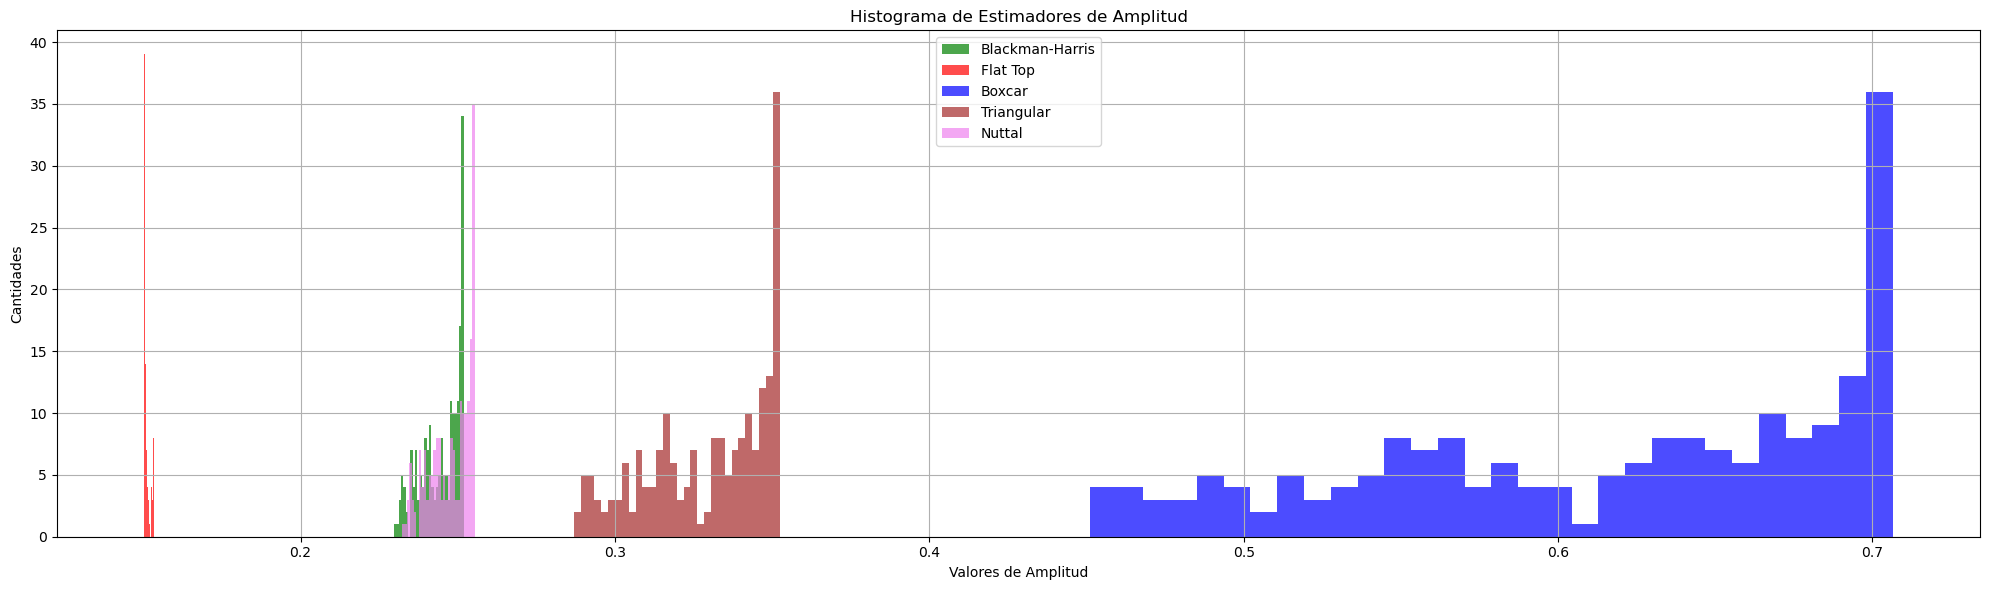

<Figure size 640x480 with 0 Axes>

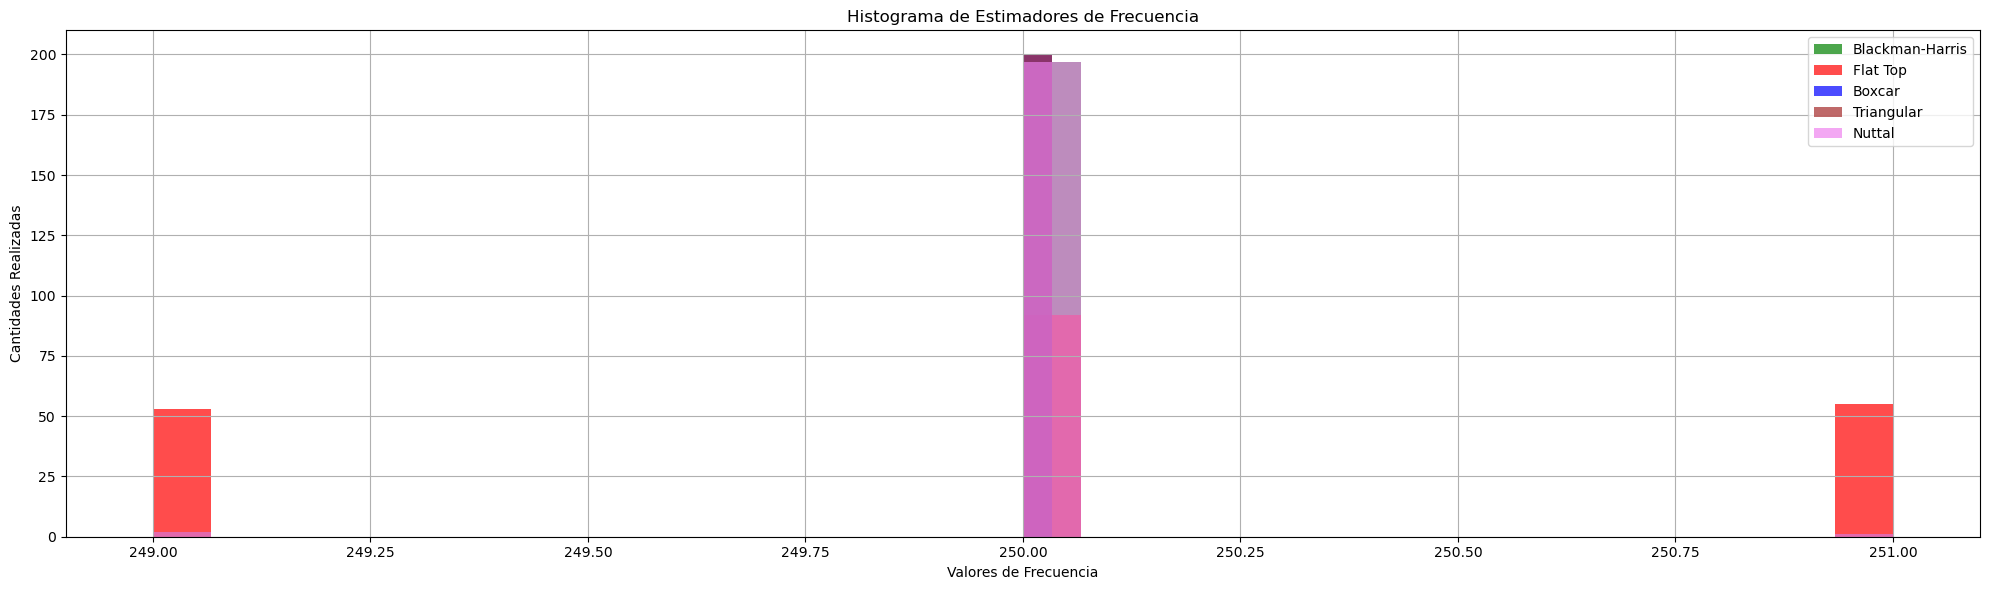

In [459]:
## Histogramas de amplitud y frecuencias para 10dB
bins=30
plt.figure(1)
plt.figure(figsize=(20, 6))
plt.hist(a_estimador_1, bins=bins,label='Blackman-Harris', color='green', alpha=0.7)
plt.hist(a_estimador_2, bins=bins,label='Flat Top', color='red', alpha=0.7)
plt.hist(a_estimador_3, bins=bins,label='Boxcar', color='blue', alpha=0.7)
plt.hist(a_estimador_4, bins=bins,label='Triangular', color='brown', alpha=0.7)
plt.hist(a_estimador_5, bins=bins,label='Nuttal', color='violet', alpha=0.7)
plt.title("Histograma de Estimadores de Amplitud")
plt.xlabel('Valores de Amplitud')
plt.ylabel('Cantidades')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

plt.figure(2)
plt.figure(figsize=(20, 6))
plt.hist(omega_estimador_1, bins=bins,label='Blackman-Harris', color='green', alpha=0.7)
plt.hist(omega_estimador_2, bins=bins,label='Flat Top', color='red', alpha=0.7)
plt.hist(omega_estimador_3, bins=bins,label='Boxcar', color='blue', alpha=0.7)
plt.hist(omega_estimador_4, bins=bins,label='Triangular', color='brown', alpha=0.7)
plt.hist(omega_estimador_5, bins=bins,label='Nuttal', color='violet', alpha=0.7)
plt.title("Histograma de Estimadores de Frecuencia")
plt.xlabel('Valores de Frecuencia')
plt.ylabel('Cantidades Realizadas')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Observacion:
con el grafico de histograma podemos ver claramente la varianza de todas las ventanas, denotando asi muy poca varianza en la flat-top con respecto a las amplitudes, la nuttall y blackman harris casi iguales, Y la boxcar muy variable entre los valores.

Ademas podemos notar la muy poca resolucion que hay en funcion de la frecuencia.

In [460]:
##Redefino una nueva cantidad de muestras
N_2=10*N # Nueva cantidad de muestras
df_2=df*1/10 # Nueva Resolucion espectral

#Uso la señal de 10dB de potencia.
final_fft_1_padding = 1/N*np.fft.fft(ventaneo_1,n=N_2,axis=0)
final_fft_2_padding = 1/N*np.fft.fft(ventaneo_2,n=N_2,axis=0)
final_fft_3_padding = 1/N*np.fft.fft(ventaneo_3,n=N_2,axis=0)
final_fft_4_padding = 1/N*np.fft.fft(ventaneo_4,n=N_2,axis=0)
final_fft_5_padding = 1/N*np.fft.fft(ventaneo_5,n=N_2,axis=0)
#Aplico valor absoluto a la transformada
final_BMH_padding = np.abs(final_fft_1_padding)
final_FLT_padding = np.abs(final_fft_2_padding)
final_BOX_padding = np.abs(final_fft_3_padding)
final_TRA_padding = np.abs(final_fft_4_padding)
final_NUT_padding = np.abs(final_fft_5_padding)
#Calculo de estimadores
k_1_padding=np.argmax(final_BMH_padding[:N_2//2, :],axis=0)
k_2_padding=np.argmax(final_FLT_padding[:N_2//2, :],axis=0)
k_3_padding=np.argmax(final_BOX_padding[:N_2//2, :],axis=0)
k_4_padding=np.argmax(final_TRA_padding[:N_2//2, :],axis=0)
k_5_padding=np.argmax(final_NUT_padding[:N_2//2, :],axis=0)
#Calculo de omega
omega_1_padding=k_1_padding*df_2
omega_2_padding=k_2_padding*df_2
omega_3_padding=k_3_padding*df_2
omega_4_padding=k_4_padding*df_2
omega_5_padding=k_5_padding*df_2


<Figure size 640x480 with 0 Axes>

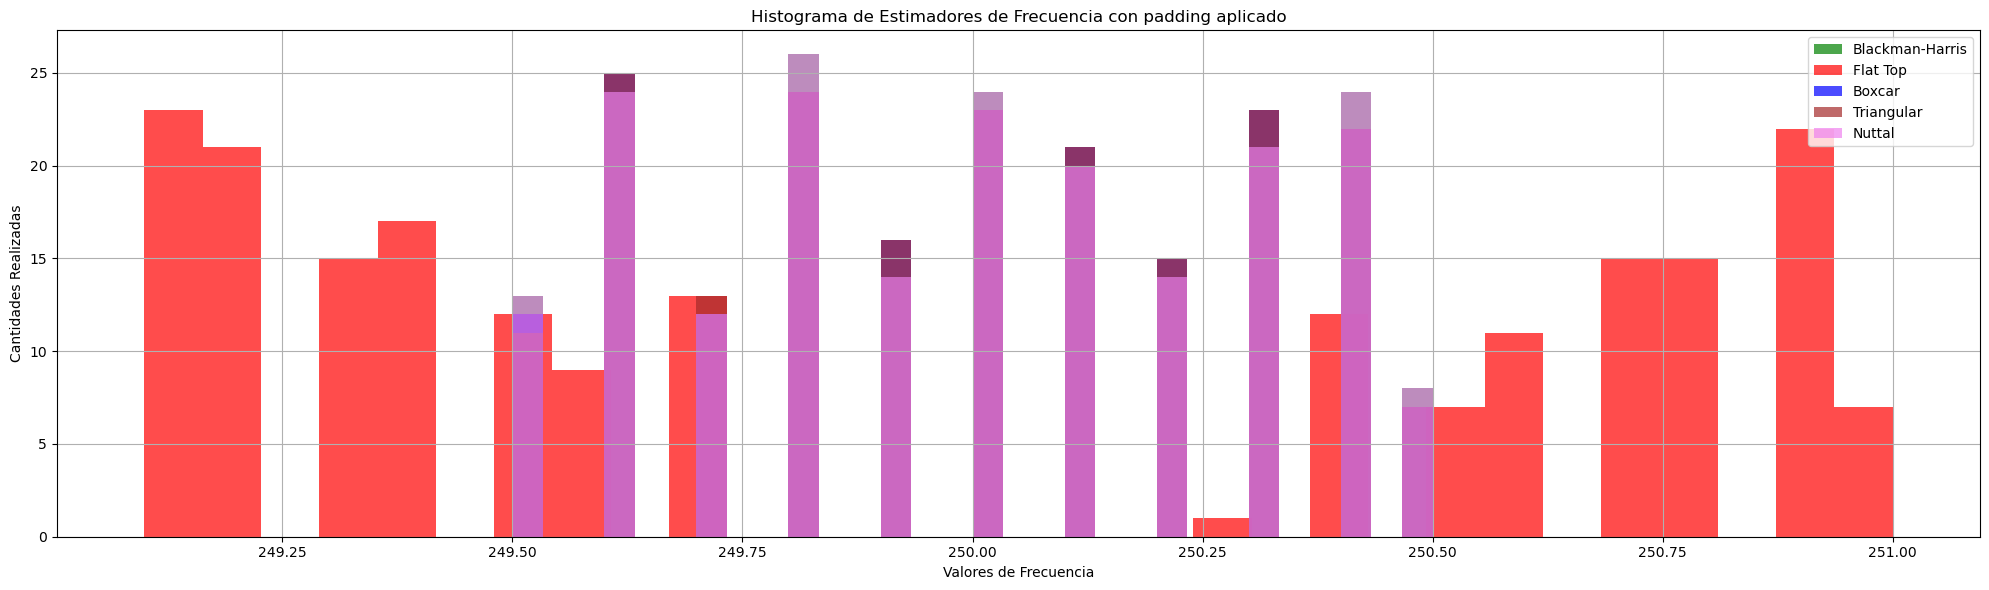

In [461]:
##Grafico histogramas con el padding
plt.figure(3)
plt.figure(figsize=(20, 6))
plt.hist(omega_1_padding, bins=bins,label='Blackman-Harris', color='green', alpha=0.7)
plt.hist(omega_2_padding, bins=bins,label='Flat Top', color='red', alpha=0.7)
plt.hist(omega_3_padding, bins=bins,label='Boxcar', color='blue', alpha=0.7)
plt.hist(omega_4_padding, bins=bins,label='Triangular', color='brown', alpha=0.7)
plt.hist(omega_5_padding, bins=bins,label='Nuttal', color='violet', alpha=0.7)
plt.title("Histograma de Estimadores de Frecuencia con padding aplicado")
plt.xlabel('Valores de Frecuencia')
plt.ylabel('Cantidades Realizadas')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

OBS : Una vez hecho esto se nota una mayor variacion con respecto a las frecuencias, viendo asi como la flat-top es la unica que se dispersa mas alla de un intervalo que esta entre 250 +-0.5. Las demas venteanas caen en este intervalo que es esperable, ya que al principio definimos una distribucion uniforme en ese sector.

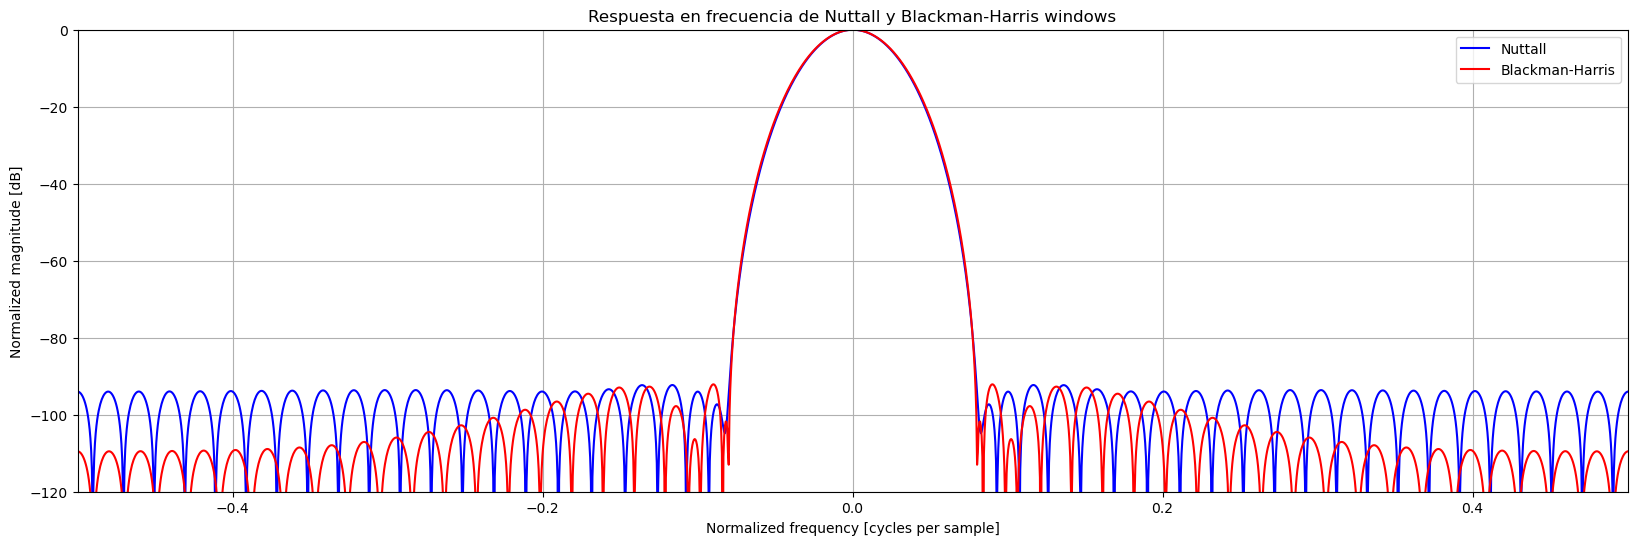

In [464]:
## Grafico de las ventanas limpias
window_1 = signal.windows.nuttall(51)
window_2 = signal.windows.blackmanharris(51)

plt.figure(figsize=(20, 6))
A = fft(window_1, 2048) / (len(window_1)/2.0)
B= fft(window_2, 2048) / (len(window_2)/2.0)
freq_1 = np.linspace(-0.5, 0.5, len(A))
freq_2 = np.linspace(-0.5, 0.5, len(B))
response_1 = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
response_2 = 20 * np.log10(np.abs(fftshift(B / abs(B).max())))
plt.plot(freq_1, response_1,color='blue', label='Nuttall')
plt.plot(freq_2, response_2,color='red', label='Blackman-Harris')
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Respuesta en frecuencia de Nuttall y Blackman-Harris windows")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.grid()
plt.legend()
plt.show()

Podemos ver como la Nutall y la blackman-Harris son identicas con respecto al tamaño del lobuo principal, pero se oberseva como hhay diferencias en los  pisos de ruido o sus sub-lobulos consecutivos, como la nutall mantiene una pendiente constante en el plano. en cambio  la blackman harris se nota una pendiente decreciente y como al empezar el principal sufre una pequeña deformacion.
Entiendo que al tener un mismo comportamiento en el lobulo principal voy a obtener la misma respuesta de amplitud y frecuencia en lo que intervenga las dos  ventanas.

In [469]:
tabla = pd.DataFrame({
"Sesgo Amplitud ": [sesgo_a_BHK_2, sesgo_a_FLT_2, sesgo_a_BOX_2, sesgo_a_TRA_2, sesgo_a_NUT_2],
"Varianza Amplitud ":[varianza_a_BHK_2,varianza_a_FLT_2,varianza_a_BOX_2,varianza_a_TRA_2,varianza_a_NUT_2],
"Sesgo Frecuencia":[sesgo_omega_BHK_2, sesgo_omega_FLT_2, sesgo_omega_BOX_2, sesgo_omega_TRA_2, sesgo_omega_NUT_2],
"Varianza Frecuencia":[varianza_omega_BHK_2,varianza_omega_FLT_2,varianza_omega_BOX_2,varianza_omega_TRA_2,varianza_omega_NUT_2]
}, index=["Blackman-Harris", "Flat-top", "Boxcar", "Triangular", "Nuttall"])
tabla.style.set_caption("") \
    .format("{:.16f}") \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])

,Sesgo Amplitud,Varianza Amplitud,Sesgo Frecuencia,Varianza Frecuencia
Blackman-Harris,-1.1740220605378362,0.0000297218718718,-0.0264555328584208,0.0437750000000000
Flat-top,-1.2690446671569375,0.0000182335649154,-0.0964555328584140,0.5739750000000001
Boxcar,-0.8029674063115465,0.0055996981181223,0.0135444671415712,0.0049750000000000
Triangular,-1.0872870553167049,0.0003550635355071,-0.0014555328584152,0.0199000000000000
Nuttall,-1.1708854429882261,0.0000327583125410,-0.0264555328584208,0.0437750000000000


<h4 align="center">Tabla de Sesgo y Varianza por Ventana con SNR =3dB</h4>


### Analisis:
No se nota muchas diferencias con respecto a 10dB, los valores se siguen correspondiendo entre si pero a una escala mayor comparada a 10dB. 